In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_feature = 10000
maxlen = 500
batch_size =32

(input_train, y_train), (input_test, y_test) = imdb.load_data(path='/Users/yangbao/PycharmProjects/datadig/mytest_ch6_RNN&LSTM/imdb.npz', num_words=max_feature)
input_train = sequence.pad_sequences(input_train, maxlen)
input_test = sequence.pad_sequences(input_test, maxlen)

In [2]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 44s 282ms/step - loss: 0.4924 - acc: 0.7558 - val_loss: 0.3345 - val_acc: 0.8686

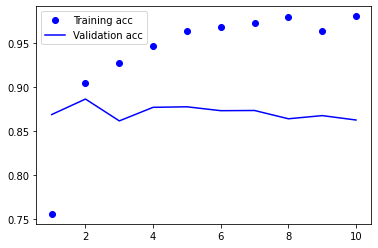

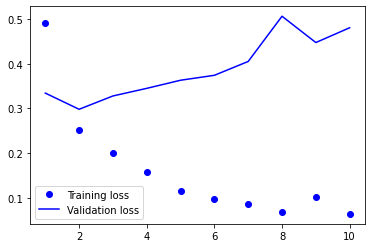

In [3]:
import  matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
str = 'I love you everyday'
list = []
list.append(str)
tokenizer = Tokenizer(num_words=maxlen)
tokenizer.fit_on_texts(list)
sequences = tokenizer.texts_to_sequences(list)

word_index = tokenizer.word_index

x = pad_sequences(sequences,maxlen=maxlen)
predict = model.predict(x)
predict

array([[0.515439]], dtype=float32)

In [13]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 47s 299ms/step - loss: 0.5252 - acc: 0.7212 - val_loss: 0.3576 - val_acc: 0.8454

In [ ]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(max_feature,32))
model.add(Bidirectional(LSTM(32)))
model.add(Bidirectional(GRU(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)